In [137]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

input = './data/IMG_2317_maual_cleaned'

In [138]:
img = cv2.imread(input + ".jpg")
img_thresholded = cv2.inRange(img, (50, 50, 50), (140, 140, 140))

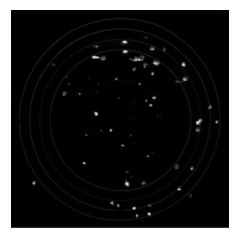

In [139]:
plt.imshow(img_thresholded, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [140]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img_thresholded, cv2.MORPH_OPEN, kernel)

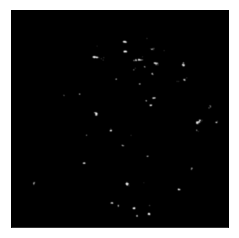

In [141]:
plt.imshow(opening, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [142]:
image, contours, hierarchy = cv2.findContours(opening.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours))
# print(contours)

86


In [143]:
i = 0
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(img,center,radius,(0,255,0),2)
    # labelling the circles around the centers, in no particular order.
    position = (center[0] - 10, center[1] + 10)
    text_color = (0, 0, 255)
    i += 1
    cv2.putText(img, str(i), position, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 3)

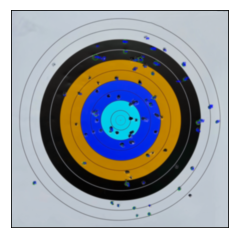

In [144]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [145]:
cv2.imwrite(input + "_processed.jpg",img)

True

In [146]:
from sklearn.mixture import GaussianMixture as GMM

In [147]:
data = []
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    data.append([x, y])
print(len(data))
print(data)
X_train = np.vstack([data])
print(len(X_train))
print(X_train)

86
[[1612.2142333984375, 2642.5], [1764.0948486328125, 2620.81396484375], [1572.8204345703125, 2544.3134765625], [1772.0, 2510.5], [1372.0, 2514.5], [1290.31640625, 2479.937744140625], [2149.65625, 2305.346435546875], [1509.0, 2258.5], [1698.0, 2219.0], [1485.765380859375, 2233.45556640625], [297.0, 2228.0], [291.0, 2213.5], [2306.0, 2049.5], [2312.0, 2034.75], [935.257568359375, 1970.0], [1745.0, 1879.5], [1442.5, 1746.0], [1426.0, 1744.5], [1535.0, 1614.0], [965.478271484375, 1611.5977783203125], [2397.0, 1563.0], [2376.0, 1551.5], [1276.5, 1552.5], [1276.0, 1553.0], [2373.5, 1543.0], [1275.0, 1529.0], [2627.5, 1447.5], [2392.5, 1450.0], [2437.0, 1435.0], [2639.5, 1432.5], [2447.0, 1422.0], [2416.5, 1420.9375], [1083.0, 1340.5], [1085.0, 1326.0], [2531.5, 1264.0], [2552.5, 1251.0], [2554.0, 1237.0], [2544.5, 1235.5], [1788.0, 1228.7353515625], [1727.933349609375, 1173.0], [1828.25, 1135.0], [677.0, 1103.0], [877.3120727539062, 1086.352294921875], [1645.9210205078125, 956.0], [2143.0,

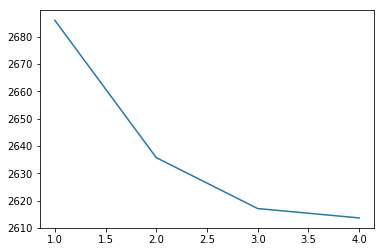

In [148]:
n_components = np.arange(1, 5, 1)
models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(X_train).aic(X_train) for model in models]
plt.plot(n_components, aics)
plt.show()

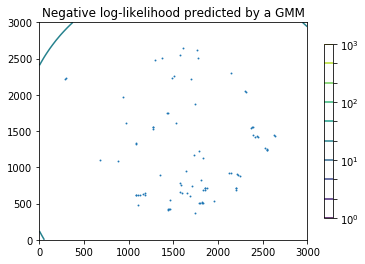

In [149]:
# display predicted scores by the model as a contour plot

from matplotlib.colors import LogNorm

x = np.linspace(0., 3000.)
y = np.linspace(0., 3000.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -models[0].score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()